<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

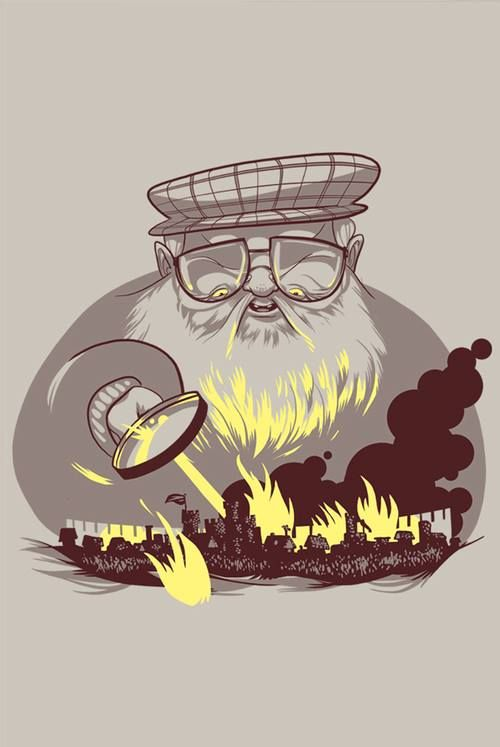

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 5.19MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 59.3MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data_train = pd.read_csv("/content/game_of_thrones_train.csv")
data_test = pd.read_csv("/content/game_of_thrones_test.csv")

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [4]:
#создала функцию для обработки данных, чтобы data_train и data_test обрабатывались одинаковым образом

#введен признак isPopular, boolDeadRelations по образцу

#Из name и house остался только house с фамилиями персонажей

#culture упрощен по образцу

# вместо age и dateOfBirth введен признак age_correspondence, который проверяет соответствие age+dateOfBirth == 305

#в процессе one hot encoding в параметрах encoder все наименования категориальных признаков, которые встречаются меньше 5 раз, отправляются в категорию rare

#в функции удаляются все ненужные признаки

#в результате этой функции, data_train и data_test превращаются в готовые массивы для моделей

def data_processing(data_train, rare_houses = None, rare_titles = None, rare_cultures=None, encoder = None):
  #creating isPopular
  popularity_coefficient = 0.5
  data_train['isPopular'] =  data_train['popularity'].apply(lambda row: 1 if row > popularity_coefficient else 0 )
  #creating boolDeadRelations
  data_train['boolDeadRelations'] = data_train['numDeadRelations'].apply(lambda row: True if row > 0 else False)

  #simplifying culture
  cult = {
      'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
      'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
      'Asshai': ["asshai'i", 'asshai'],
      'Lysene': ['lysene', 'lyseni'],
      'Andal': ['andal', 'andals'],
      'Braavosi': ['braavosi', 'braavos'],
      'Dornish': ['dornishmen', 'dorne', 'dornish'],
      'Myrish': ['myr', 'myrish', 'myrmen'],
      'Westermen': ['westermen', 'westerman', 'westerlands'],
      'Westerosi': ['westeros', 'westerosi'],
      'Stormlander': ['stormlands', 'stormlander'],
      'Norvoshi': ['norvos', 'norvoshi'],
      'Northmen': ['the north', 'northmen'],
      'Free Folk': ['wildling', 'first men', 'free folk'],
      'Qartheen': ['qartheen', 'qarth'],
      'Reach': ['the reach', 'reach', 'reachmen'],
  }
  for header in cult:
    data_train['culture'] = data_train['culture'].replace(cult[header], header)

  #creating age correspondence 305 AC

  data_train['age_correspondence'] = data_train.apply(lambda row: 1 if (row['age'] + row['dateOfBirth']) == 305.0 else (100 if math.isnan(row['age']) else 0), axis=1)
  data_train.drop(['age','dateOfBirth'],axis=1,inplace=True)

  data_train['isAliveHeir'] = data_train['isAliveHeir'].fillna(False)
  data_train['isAliveHeir'] = data_train['isAliveHeir'].astype(int)

  #creating Surname
  data_train['house'] = data_train["name"].str.split().str[-1]
  data_train.drop(['name'],axis=1,inplace=True)

  data_train.drop(['S.No','mother','father','heir','spouse'],axis=1,inplace = True)

  unprocessed_cat_features = ['culture','age_correspondence','title','isAliveFather','isAliveMother', 'isAliveSpouse','house','numDeadRelations']

  #Initialize OneHotEncoder
  if encoder is None:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown = 'infrequent_if_exist', min_frequency = 5)
    # Apply one-hot encoding to the categorical columns
    one_hot_encoded = encoder.fit_transform(data_train[unprocessed_cat_features])
  else:
    one_hot_encoded = encoder.transform(data_train[unprocessed_cat_features])


  #Create a DataFrame with the one-hot encoded columns
  #We use get_feature_names_out() to get the column names for the encoded data
  one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data_train.index)

  df_encoded = pd.concat([data_train, one_hot_data], axis=1)

  # Drop the original categorical columns
  df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

  # Display the resulting dataframe
  df_encoded = df_encoded.drop(['isAliveFather_nan','isAliveMother_nan','isAliveSpouse_nan'],axis=1)

  return df_encoded, rare_houses, rare_titles, rare_cultures, encoder



In [5]:
#data processing

df_encoded, rare_houses, rare_titles, rare_cultures, encoder = data_processing(data_train.copy())
df_encoded_test,_,_,_,_ = data_processing(data_test.copy(), rare_houses, rare_titles, rare_cultures, encoder)


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

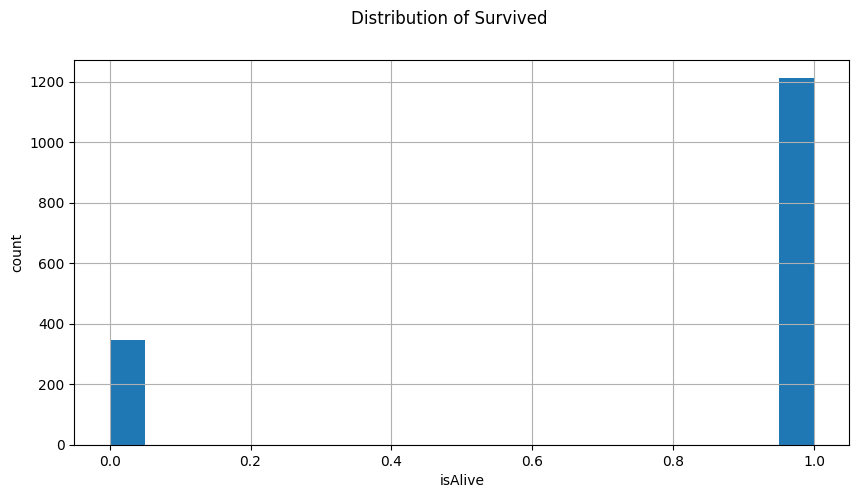

In [6]:
plt.figure(figsize = (10, 5))

df_encoded['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of Survived')
plt.show()

# **Классы не сбалансированы**

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

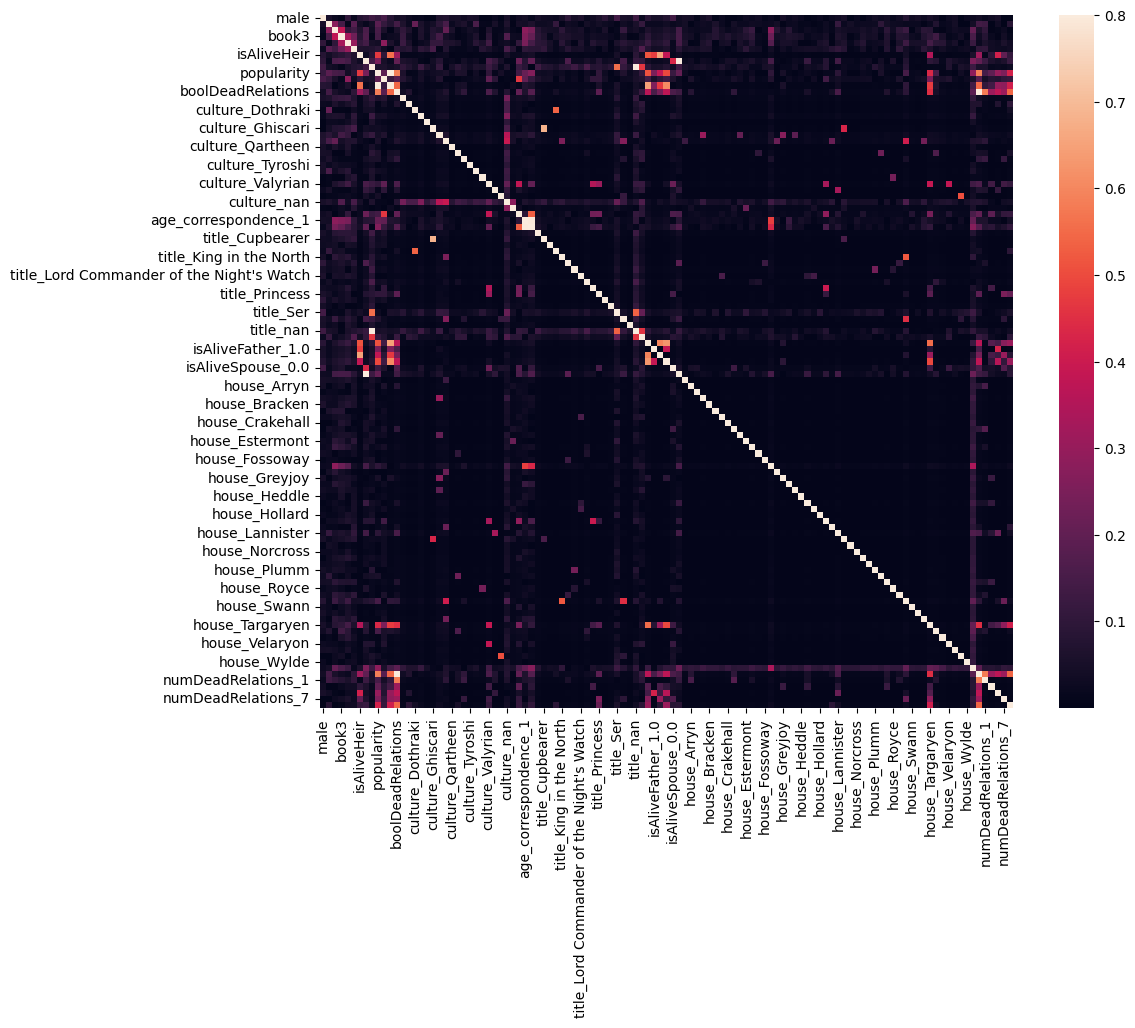

In [7]:
corrmat = df_encoded.corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Text(0.5, 1.0, 'Appeared in book5')

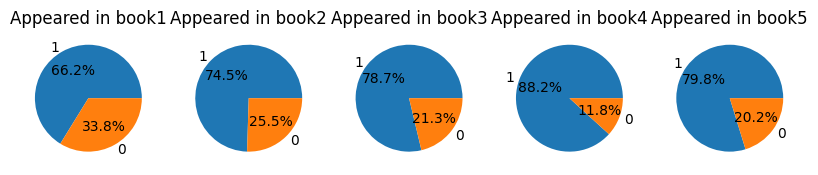

In [8]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(10,8))

data1 = df_encoded[df_encoded['book1'] == 1]['isAlive'].value_counts()
data2 = df_encoded[df_encoded['book2'] == 1]['isAlive'].value_counts()
data3 = df_encoded[df_encoded['book3'] == 1]['isAlive'].value_counts()
data4 = df_encoded[df_encoded['book4'] == 1]['isAlive'].value_counts()
data5 = df_encoded[df_encoded['book5'] == 1]['isAlive'].value_counts()

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data3.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data3.index, autopct='%1.1f%%')

ax1.set_title("Appeared in book1")
ax2.set_title("Appeared in book2")
ax3.set_title("Appeared in book3")
ax4.set_title("Appeared in book4")
ax5.set_title("Appeared in book5")

Text(0.5, 1.0, 'popular heroes')

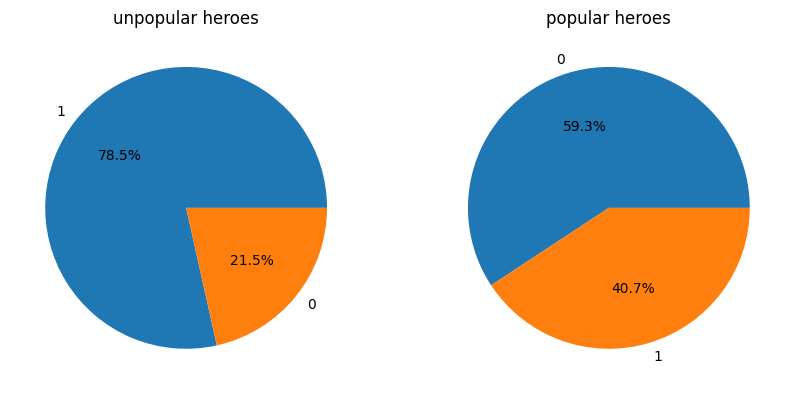

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

data1 = df_encoded[df_encoded['isPopular'] == 0]['isAlive'].value_counts()
data2 = df_encoded[df_encoded['isPopular'] == 1]['isAlive'].value_counts()


ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("unpopular heroes")
ax2.set_title("popular heroes")

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [10]:
X = df_encoded.drop(columns=['isAlive']).values
y = df_encoded['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 44)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [13]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [14]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [15]:
models = [LogisticRegression(C=3),GaussianProcessClassifier(), AdaBoostClassifier(), RandomForestClassifier(n_estimators = 150, max_depth = 5), GaussianNB(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]
y_preds = []
for model in models:
  model.fit(X_train, y_train)
  y_preds.append(model.predict(X_test))

In [16]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

param_grid = {
 'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': np.arange(1, 6, 2)
}

# создадим объект GridSearchCV
gridsearch = GridSearchCV(model, param_grid, refit=True)

# запустим поиск
gridsearch.fit(X_train, y_train)

# выведем наилучшие параметры
print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

{'criterion': 'log_loss', 'max_depth': np.int64(5)}


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [19]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [20]:

# Шаг 4. Оценка предсказания по метрике accuracy
for y_pred in y_preds:
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8686
Accuracy : 0.8494
Accuracy : 0.8750
Accuracy : 0.8558
Accuracy : 0.4295
Accuracy : 0.8333
Accuracy : 0.8590
Accuracy : 0.8173


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [21]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 7.92MB/s]


In [22]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [23]:
# Шаг 1. создание модели

logistic_regression = AdaBoostClassifier()
# RandomForestClassifier(n_estimators = 150, max_depth = 10,criterion = 'entropy',max_features = None)

X_train_new = df_encoded.drop(columns=['isAlive']).values
y_train_new = df_encoded['isAlive'].values

# Шаг 2. обучение модели
logistic_regression.fit(X_train_new, y_train_new)

# Шаг 3. Предсказание на тестовых данных
X_test_new = df_encoded_test.values
submission['isAlive'] = logistic_regression.predict(X_test_new)

Как сохранить измененный Pandas DataFrame в csv файл:

In [24]:
submission.to_csv("/content/new_submission.csv", index=False)